In [10]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [18]:
df=pd.read_csv("FitBit data.csv")
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [19]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Number of variables,15
Number of observations,457
Total Missing (%),0.0%
Total size in memory,53.7 KiB
Average record size in memory,120.3 B
Numeric,12
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,2


In [20]:
df.shape

(457, 15)

In [21]:
missing_df=pd.DataFrame()
missing_df['Columns']=df.isnull().sum().keys()
missing_df['Values']=df.isnull().sum().values.tolist()
missing_df[missing_df['Values']>0]

,Columns,Values


In [38]:
df_raw=df.copy()

In [39]:
df_raw.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [40]:
df_raw['ActivityDate'].unique()

array(['3/25/2016', '3/26/2016', '3/27/2016', '3/28/2016', '3/29/2016',
       '3/30/2016', '3/31/2016', '4/1/2016', '4/2/2016', '4/3/2016',
       '4/4/2016', '4/5/2016', '4/6/2016', '4/7/2016', '4/8/2016',
       '4/9/2016', '4/10/2016', '4/11/2016', '4/12/2016', '3/12/2016',
       '3/13/2016', '3/14/2016', '3/15/2016', '3/16/2016', '3/17/2016',
       '3/18/2016', '3/19/2016', '3/20/2016', '3/21/2016', '3/22/2016',
       '3/23/2016', '3/24/2016'], dtype=object)

In [42]:
df_raw['ActivityDate']=pd.to_datetime(df_raw['ActivityDate'])

df_raw['Year']=df_raw['ActivityDate'].dt.year
df_raw['Month']=df_raw['ActivityDate'].dt.month
df_raw['Date']=df_raw['ActivityDate'].dt.day
df_raw['Weekday']=df_raw['ActivityDate'].dt.weekday_name

In [43]:
df_raw.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Year,Month,Date,Weekday
0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,2016,3,25,Friday
1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,2016,3,26,Saturday
2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,2016,3,27,Sunday
3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,2016,3,28,Monday
4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,2016,3,29,Tuesday


In [44]:
df_raw.drop(['TrackerDistance'],axis=1,inplace=True)

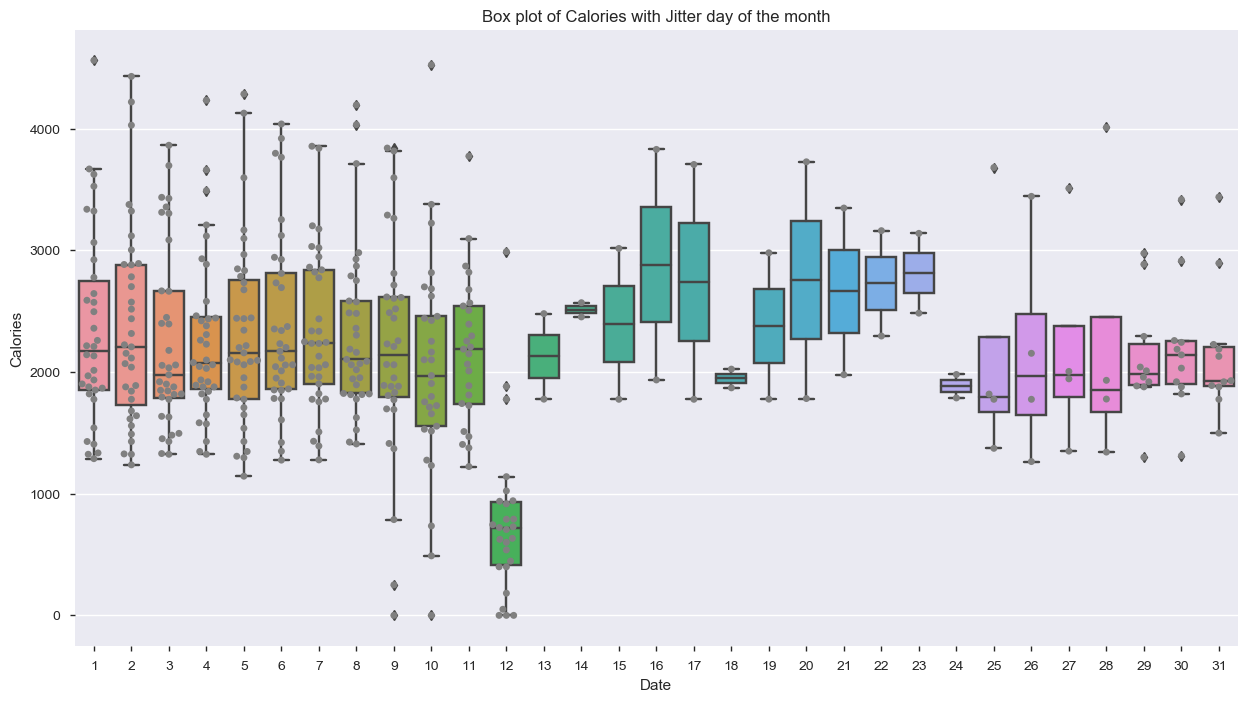

In [45]:
plt.figure(figsize=(15,8))

ax = sns.boxplot(x='Date', y='Calories', data=df_raw).set_title('Box plot of Calories with Jitter day of the month')

ax = sns.swarmplot(x='Date', y='Calories', data=df_raw, color="grey")

Text(0.5, 1.0, 'Barplot of Calories By days of week')

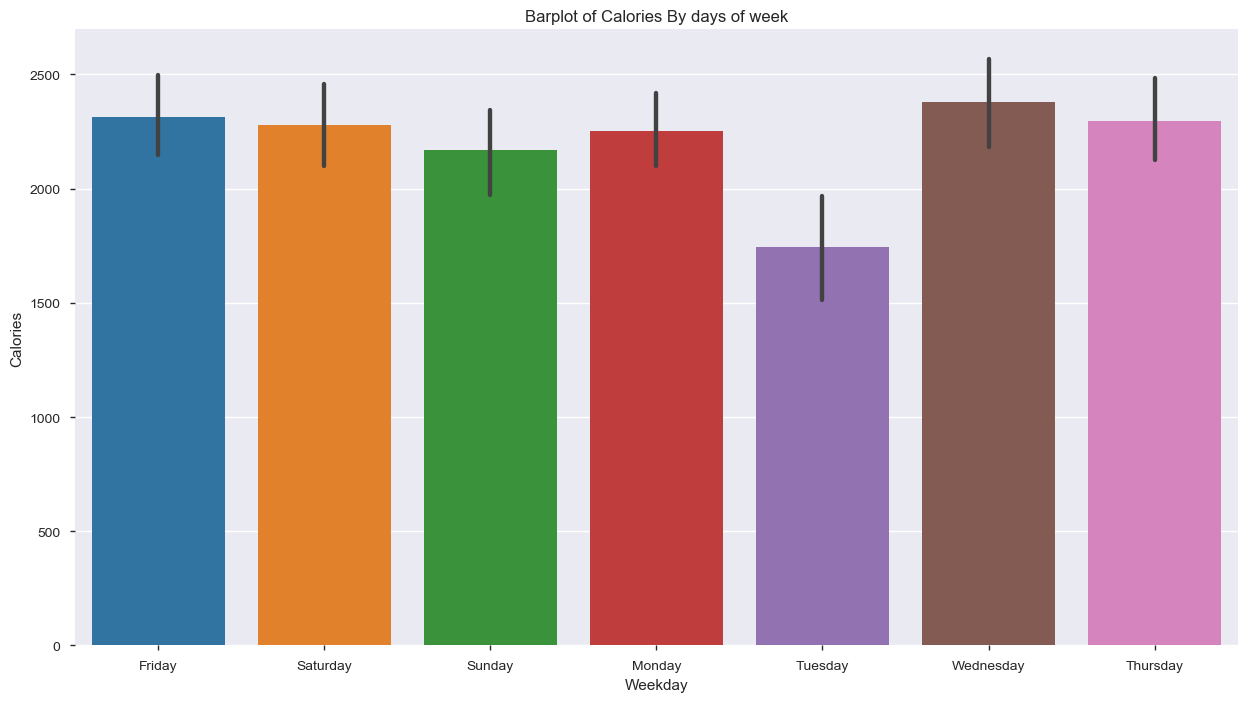

In [47]:
plt.figure(figsize=(15,8))

sns.barplot(x='Weekday',y='Calories',data=df_raw).set_title('Barplot of Calories By days of week')

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

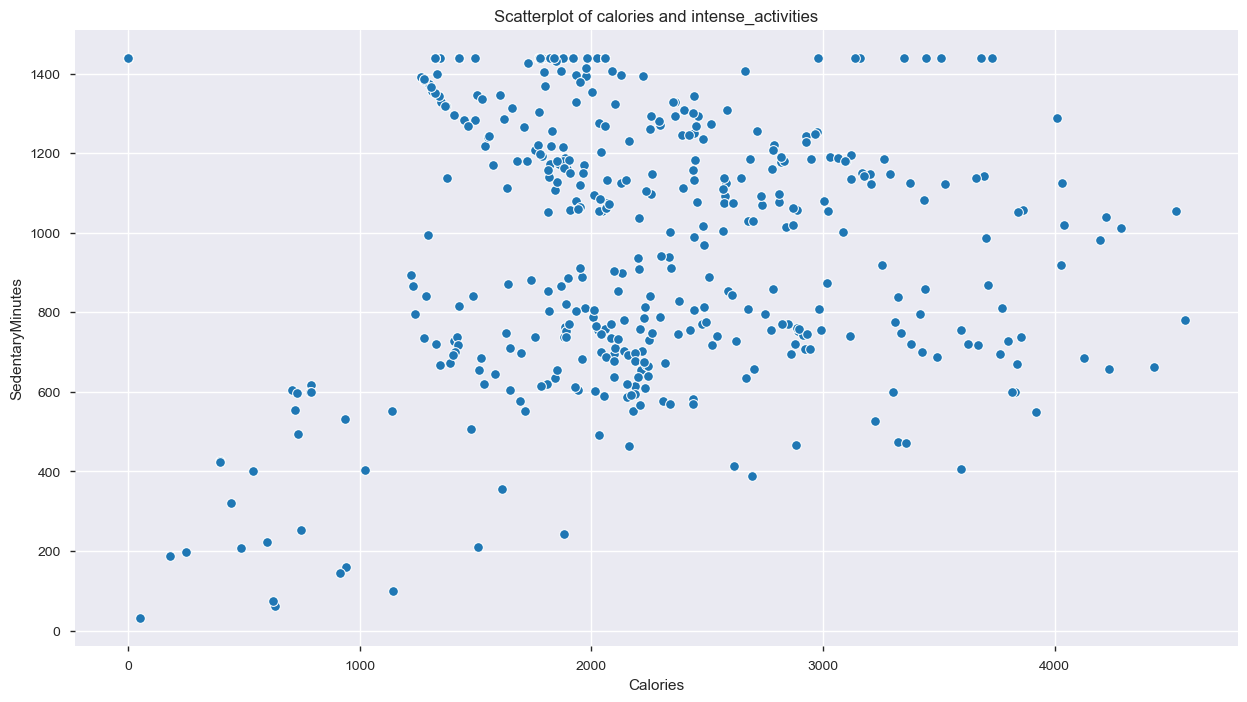

In [49]:
plt.figure(figsize=(15,8))


ax = sns.scatterplot(x='Calories', y='SedentaryMinutes', data=df_raw)

ax.set_title('Scatterplot of calories and intense_activities')

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

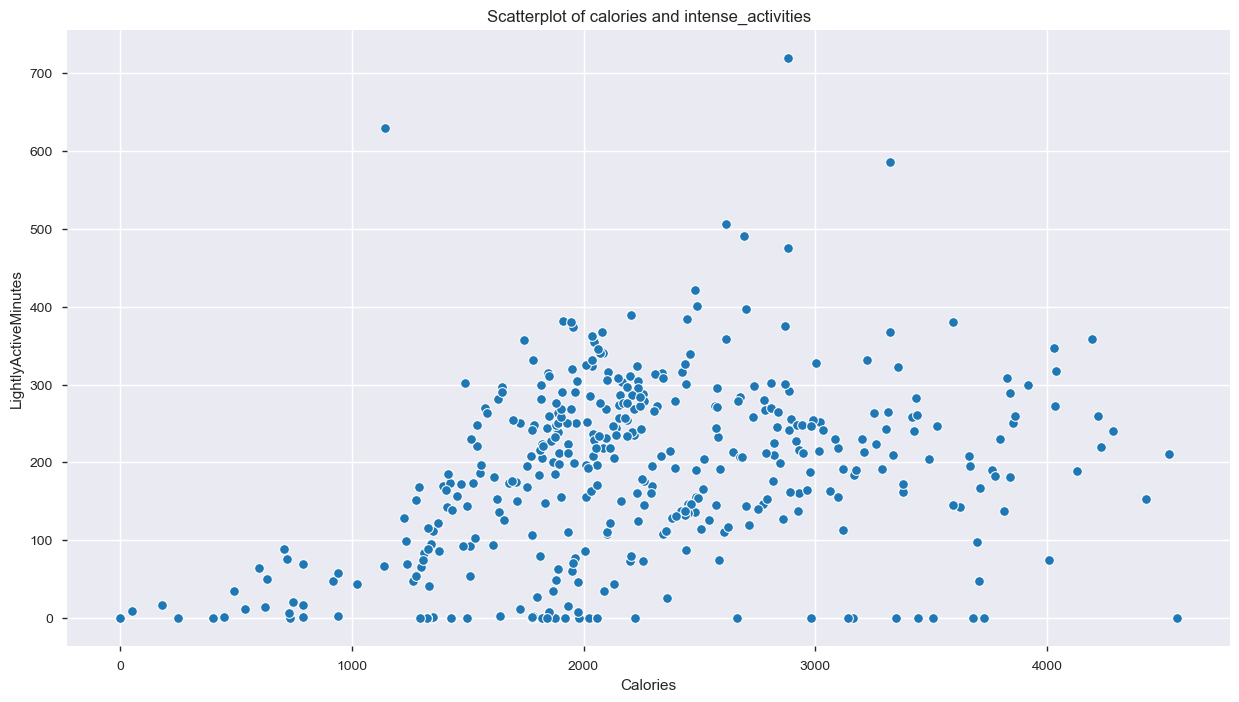

In [50]:
plt.figure(figsize=(15,8))

ax = sns.scatterplot(x='Calories', y='LightlyActiveMinutes', data=df_raw)

ax.set_title('Scatterplot of calories and intense_activities')

Text(0.5, 1.0, 'Scatterplot of calories vs Fairly Active Minutes')

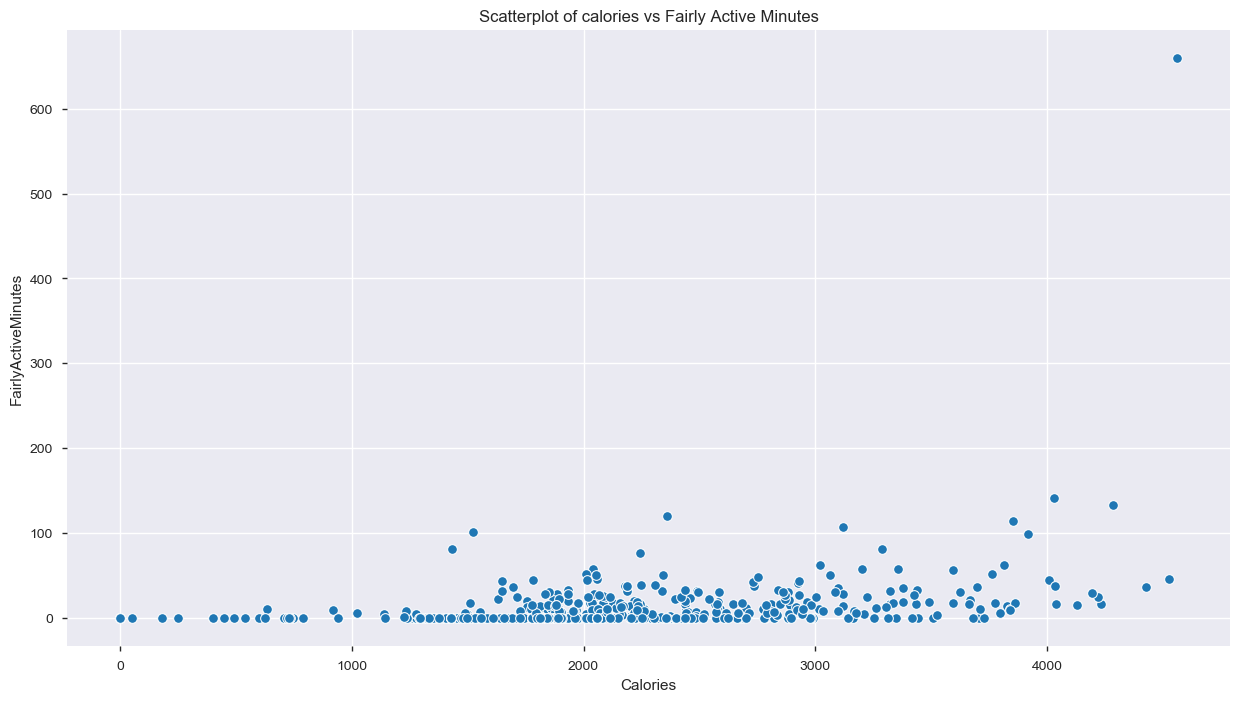

In [51]:
plt.figure(figsize=(15,8))

ax = sns.scatterplot(x='Calories', y='FairlyActiveMinutes', data=df_raw)

ax.set_title('Scatterplot of calories vs Fairly Active Minutes')

Text(0.5, 1.0, 'Scatterplot of calories vs Intense_Activities')

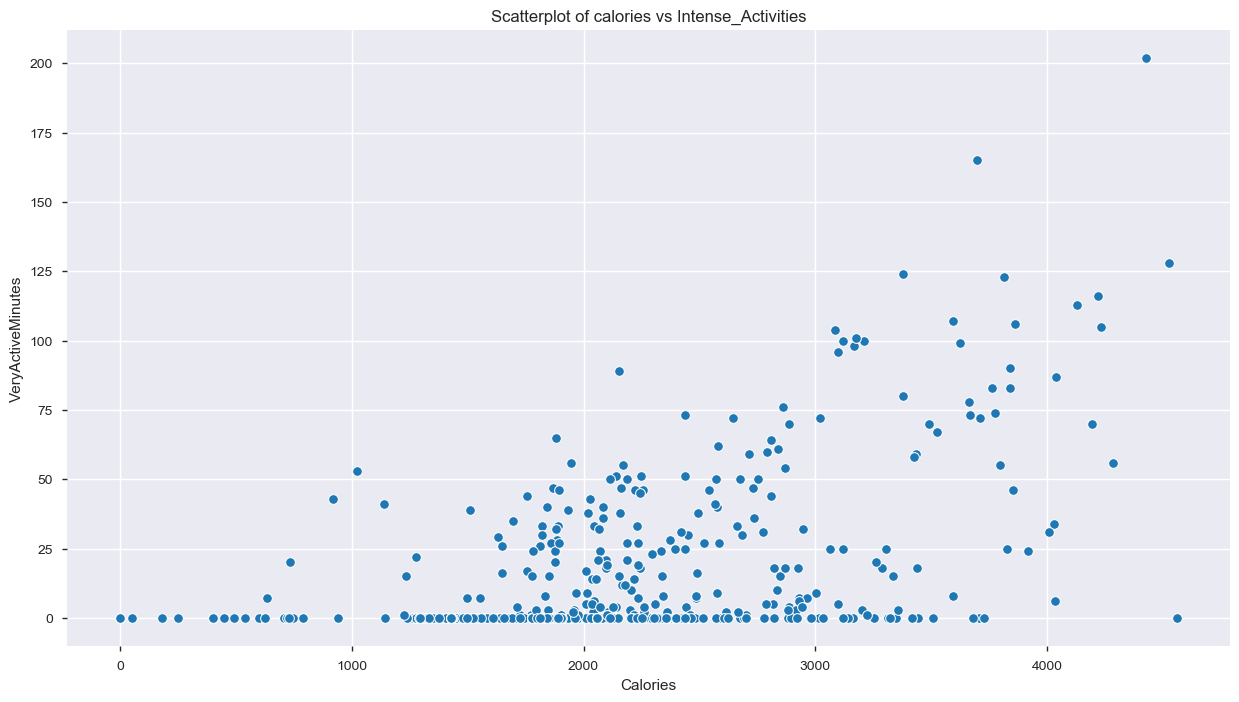

In [52]:
plt.figure(figsize=(15,8))

ax = sns.scatterplot(x='Calories', y='VeryActiveMinutes', data=df_raw)

ax.set_title('Scatterplot of calories vs Intense_Activities')

Text(0.5, 1.0, 'Un-normalized value of calories and different activities based on activity minutes')

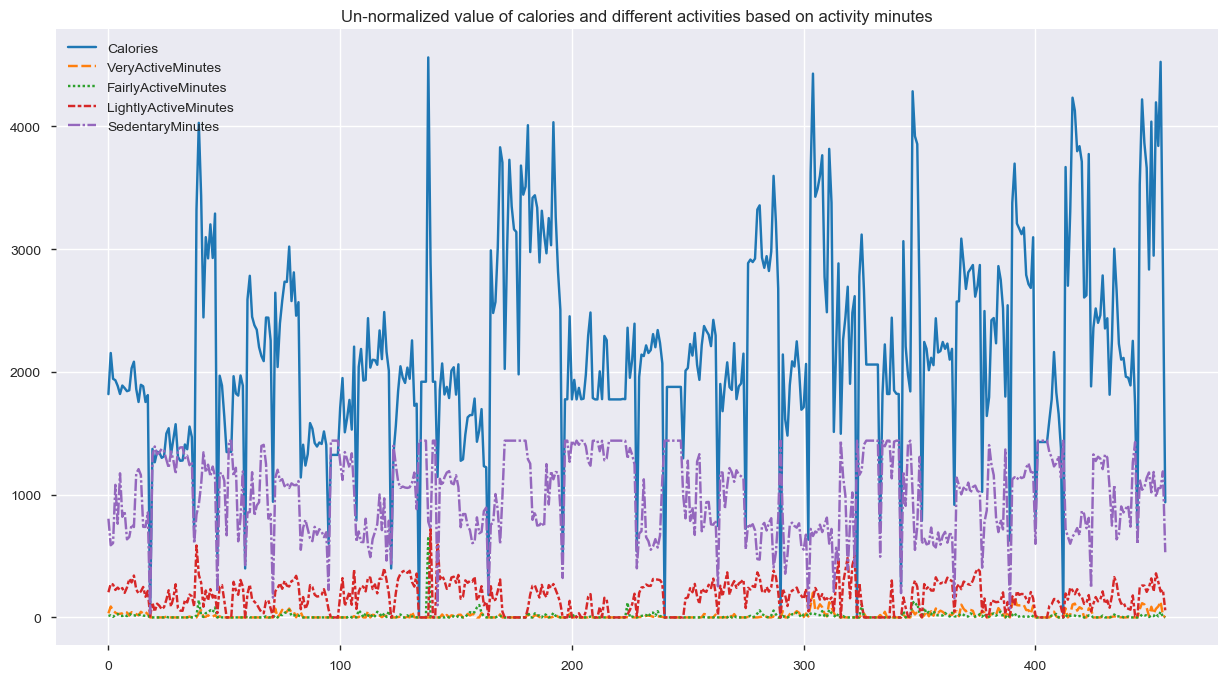

In [54]:
col_select = ['Calories','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']
wide_df = df_raw[col_select]

plt.figure(figsize=(15,8))

ax = sns.lineplot(data=wide_df)

ax.set_title('Un-normalized value of calories and different activities based on activity minutes')

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

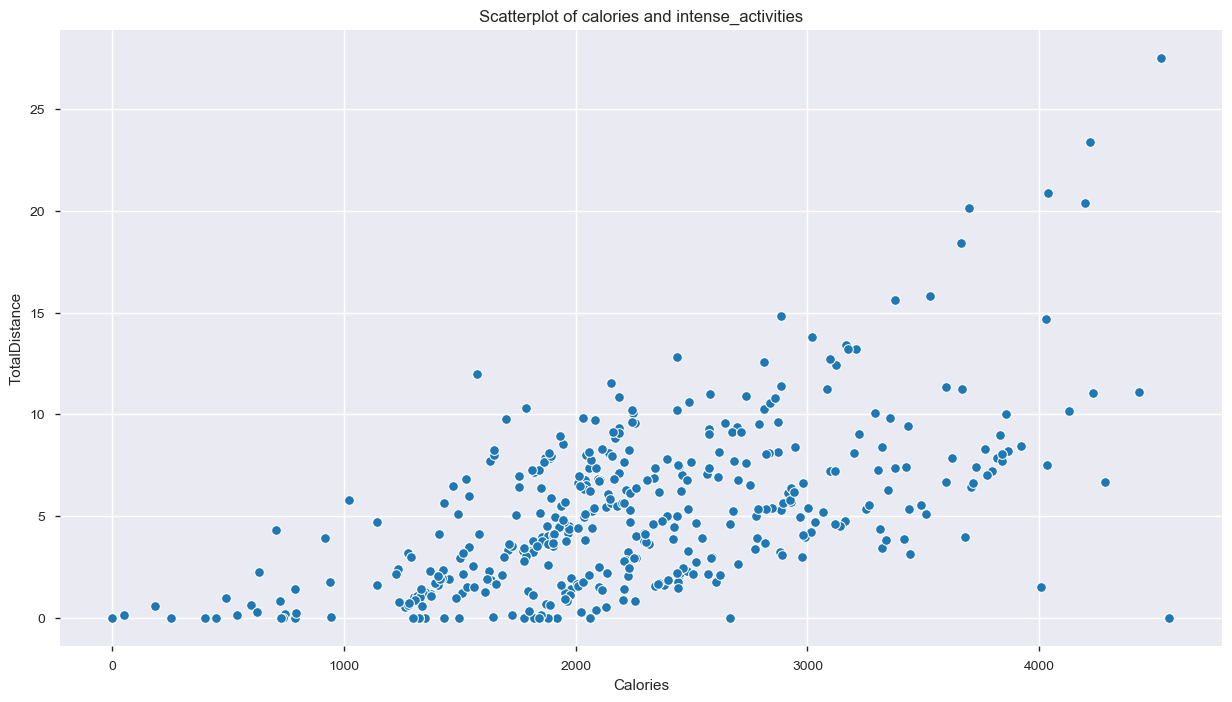

In [55]:
plt.figure(figsize=(15,8))

ax = sns.scatterplot(x='Calories', y='TotalDistance', data=df_raw)

ax.set_title('Scatterplot of calories and intense_activities')

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

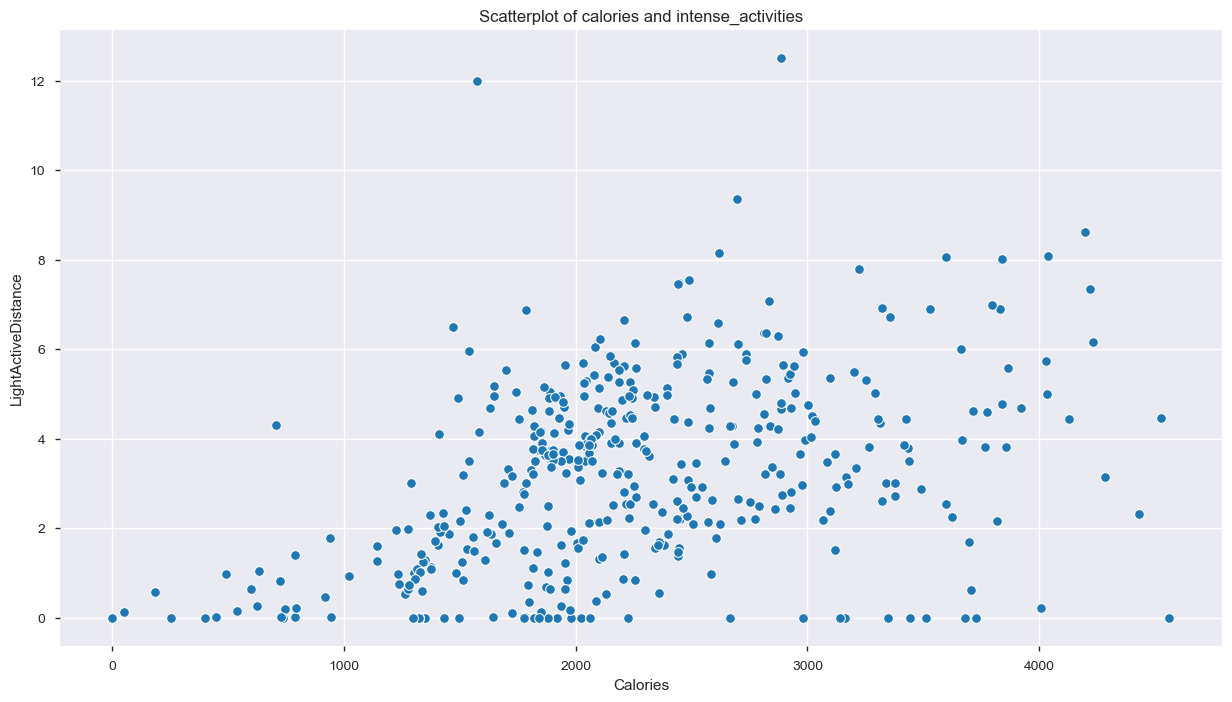

In [56]:
plt.figure(figsize=(15,8))

ax = sns.scatterplot(x='Calories', y='LightActiveDistance', data=df_raw)

ax.set_title('Scatterplot of calories and intense_activities')

Text(0.5, 1.0, 'Un-normalized value of calories and different activities based on distance')

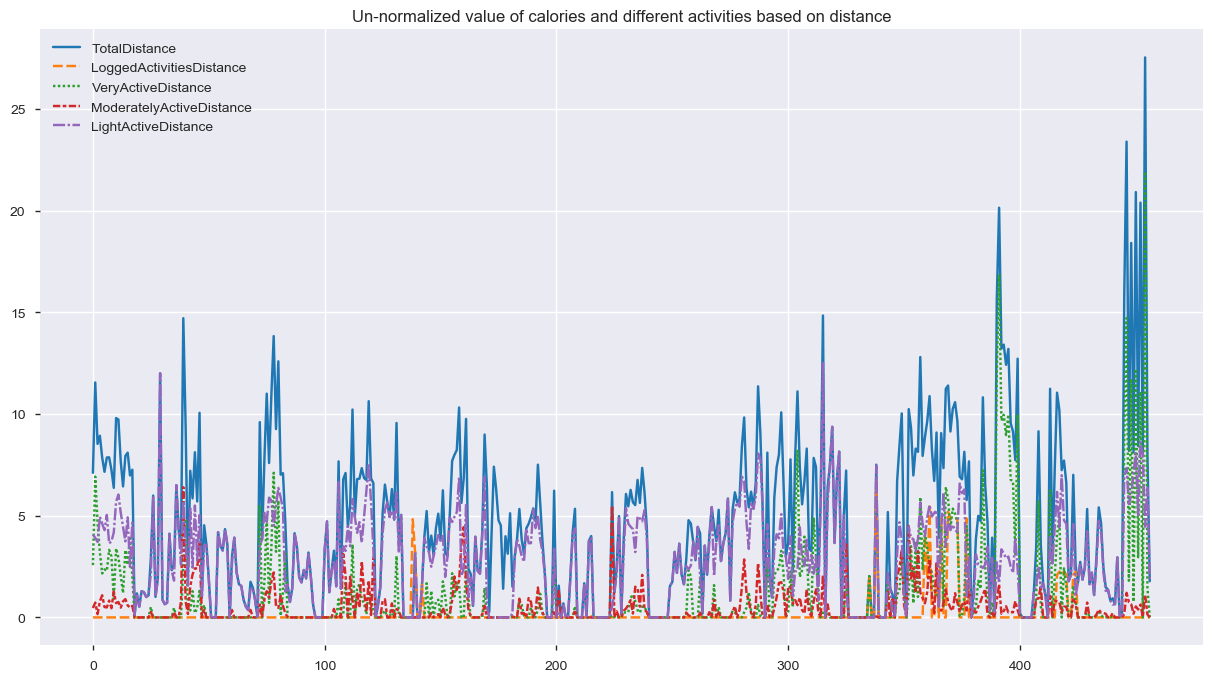

In [58]:
rol_select = ['TotalDistance','LoggedActivitiesDistance','VeryActiveDistance','ModeratelyActiveDistance', 'LightActiveDistance']
wide_df1 = df_raw[rol_select]

plt.figure(figsize=(15,8))

ax = sns.lineplot(data=wide_df1)

ax.set_title('Un-normalized value of calories and different activities based on distance')